Below is a demonstration of the intended analysis for Chapter One of my PhD. THis analysis uses the NCDS dataset using sweeps 16 and 23 (1974-1981). The following analysis focuses upon Youth Transition after mandatory education. This analysis attempts to understand the decisions, choices, and constraints that individuals face when negotiating entry into economic activity post-mandatory schooling for the first time. As such, the outcome variable of interest is a post-hoc economic activity entry from sweep 23 for the month of September when individuals were aged 16 years old. The independent variables of interest are: Sex, Housing Tenure when a child, Father's Social Class when a child, Educational Attainment at 16 (Number of O-level Passes), Reading and Maths scores at age 11. 

The analysis below is made up of several important steps. Firstly the data is cleaned and recoded in a way that the data will be used all throughout the rest of the analysis. Secondly, descriptive statistics will be produced to best understand the data. Third, model construction and sensitivity analysis of social class measures. Finally, there will be an attempt to handle missing data within the model. 

Part One: Data Cleaning and Re-coding

In [1]:
import stata_setup

stata_setup.config("E:\Stata SE", "se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 14 Sep 2023
Serial number: 401709309008
  Licensed to: Scott Oatley
               University of Edinburgh

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


The import command tells Jupyter Notebook to import stata from its given location in my internal system and call it up for use in the virutal notebook. 

In [2]:
%%stata

cd "D:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9"
use "D:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9\ncds2_occupation_coding_father"

cd "D:\Stata data and do\NCDS\NCDS Sweep 16\stata\stata11"


. 
. cd "D:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9"
D:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9

. use "D:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9\ncds2
> _occupation_coding_father"

. 
. cd "D:\Stata data and do\NCDS\NCDS Sweep 16\stata\stata11"
D:\Stata data and do\NCDS\NCDS Sweep 16\stata\stata11

. 


This is setting my cd initially to the file within my local drive that hosts the occupational codes (NS-SEC, RGSC, and CAMSIS). It then loads this occupational codes dataset into stata and then with the same cd command resets the location to the location of the sweep 16 dataset. 

In [3]:
%%stata

rename NCDSID ncdsid
  
merge 1:1 ncdsid using ncds0123
drop _merge


. 
. rename NCDSID ncdsid

.   
. merge 1:1 ncdsid using ncds0123

    Result                      Number of obs
    -----------------------------------------
    Not matched                         3,221
        from master                         0  (_merge==1)
        from using                      3,221  (_merge==2)

    Matched                            15,337  (_merge==3)
    -----------------------------------------

. drop _merge

. 


Using longitudinal data such as the NCDS, every individual participant is given a unique personal identifier. When using datasets from multiple points in time this allows for them to be merged and successfully link data across time to the same person. The unique id in the occupational codes dataset is capitalised however. Before merging the datasets the ''NCDSID'' has to be renamed to ''ncdsid''. After this the occupational codes dataset is now merged with the sweep 16 dataset. After this merge has been completed the generated variable merge is dropped. 

In [4]:
%%stata

cd "D:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9"

merge 1:1 ncdsid using ncds4
drop _merge


. 
. cd "D:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9"
D:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9

. 
. merge 1:1 ncdsid using ncds4

    Result                      Number of obs
    -----------------------------------------
    Not matched                         6,021
        from master                     6,021  (_merge==1)
        from using                          0  (_merge==2)

    Matched                            12,537  (_merge==3)
    -----------------------------------------

. drop _merge

. 


Using the cd command, the root directory is now set at the location that hosts the sweep 23 dataset. This dataset is also merged with the occupational codes and sweep 16 dataset allowing for all data to be in one central location. Merge is also dropped after a successful merge. 

In [5]:
%%stata

codebook ec201 n4655 n4656 n622_4 n2017 n1152 N2SNSSEC N2SCMSIS N2SRGSC n923 n926, compact


. 
. codebook ec201 n4655 n4656 n622_4 n2017 n1152 N2SNSSEC N2SCMSIS N2SRGSC n923 
> n926, compact

Variable     Obs Unique      Mean  Min   Max  Label
-------------------------------------------------------------------------------
ec201      12536     28  288.9482   -1   800  4D Economic Activity in Month 201
n4655      12535      3  1.401436    1     9  4I Whether 'o' levels passed
n4656       7630      9  4.974705    1     9  4I Number of 'o' levels passed
n622_4     12536      2   1.50016    1     2  Sex of Cohort Member
n2017      14653      7  .6339316   -1     6  3M Identify child's ethnic gro...
n1152      15335      7  1.498468   -1     6  2P Tenure of accomodation
N2SNSSEC   11156     30  9.735667    2  13.5  NCDS 1969 Father: NS-SEC socia...
N2SCMSIS   11158     66  4.420927  1.8   9.4  NCDS 1969 Father: CAMSIS code ...
N2SRGSC    11156      6  3.134806    1     5  NCDS 1969 Father: RGSC social ...
n923       15335     37  14.64271   -1    35  2T Reading comprehension test 

Following a successful merge of all required datasets, all intended to use variables are gathered in a compact codebook to assess the needs to potentiall recode and clean the data. Some issues are readily apparent. For example many of the variables have negative values in the minimum values, suggesting either missing or N/A data that will need to be recoded. There are also different levels of observations for each varaible in question, suggesting that missingness may pose a problem for future model creation. 

In [6]:
%%stata

tab ec201

collect export "raw.docx", replace


. 
. tab ec201

     4D Economic |
     Activity in |
       Month 201 |      Freq.     Percent        Cum.
-----------------+-----------------------------------
         MISSING |         86        0.69        0.69
          FT JOB |      4,716       37.62       38.31
    FT JOB+PT ED |        144        1.15       39.45
      FT JOB+APP |      1,842       14.69       54.15
   FTJ+APP+PT ED |         22        0.18       54.32
  FTJ+APP+DBR TC |         21        0.17       54.49
      FTJ+OTH TC |          1        0.01       54.50
         FTJ+DBR |        366        2.92       57.42
 FTJ+DBR TC+PTED |          4        0.03       57.45
         FTJ+OTH |         20        0.16       57.61
 FTJ+OTH TC+PTED |          1        0.01       57.62
FTJ+FT NT TOPSTC |         35        0.28       57.90
   FTJ+FTTC+PTED |          1        0.01       57.91
        FTJ+LGSS |          2        0.02       57.92
 FTJ+LGSS+DBR TC |          1        0.01       57.93
          PT JOB |         

Due to this variable being the desired outcome variable, it is of interest to add its raw form as a table within my PhD thesis. Especially given how many categories it includes. Not all of these acronyms can be deciphered even with the relevant codebooks and documents attached to the dataset - this is something that will need to be noted within the thesis itself, even if these incidents only make up a handful of observations. Given the categories available as well as the previous literature, this outcome variable would be best collapsed into five distinct categories: Employment, Post-Schooling Education, School, Training & Apprenticeships, and Unemployment & Out of the Labour Force. Ideally the last category would be split up into two distinct categories as qualitatively there is a difference between being unemployed and being out of the labour force, however the very low levels of observations for each would impact the overall statistical power of the model so it is best that they are combined. 

In [7]:
%%stata

gen econ201=.
replace econ201=. if (ec201==.)
replace econ201=. if (ec201==-1)
replace econ201=1 if (ec201==100)
replace econ201=1 if (ec201==101)
replace econ201=1 if (ec201==200)
replace econ201=1 if (ec201==201)

replace econ201=2 if (ec201==500)
replace econ201=2 if (ec201==800)

replace econ201=3 if (ec201==550)

replace econ201=4 if (ec201==110)
replace econ201=4 if (ec201==111)
replace econ201=4 if (ec201==113)
replace econ201=4 if (ec201==114)
replace econ201=4 if (ec201==120)
replace econ201=4 if (ec201==121)
replace econ201=4 if (ec201==130)
replace econ201=4 if (ec201==131)
replace econ201=4 if (ec201==140)
replace econ201=4 if (ec201==141)
replace econ201=4 if (ec201==150)
replace econ201=4 if (ec201==152)
replace econ201=4 if (ec201==220)
replace econ201=4 if (ec201==300)
replace econ201=4 if (ec201==400)

replace econ201=5 if (ec201==600)
replace econ201=5 if (ec201==601)
replace econ201=5 if (ec201==602)
replace econ201=5 if (ec201==700)
replace econ201=5 if (ec201==701)

label define econ_lbl 1"Employment" 2"Post-Schooling Education" 3"School" 4"Training/Apprenticeships" 5"Unemployment and OLF"
label value econ201 econ_lbl

tab econ201


. 
. gen econ201=.
(18,558 missing values generated)

. replace econ201=. if (ec201==.)
(0 real changes made)

. replace econ201=. if (ec201==-1)
(0 real changes made)

. replace econ201=1 if (ec201==100)
(4,716 real changes made)

. replace econ201=1 if (ec201==101)
(144 real changes made)

. replace econ201=1 if (ec201==200)
(37 real changes made)

. replace econ201=1 if (ec201==201)
(2 real changes made)

. 
. replace econ201=2 if (ec201==500)
(1,046 real changes made)

. replace econ201=2 if (ec201==800)
(11 real changes made)

. 
. replace econ201=3 if (ec201==550)
(3,717 real changes made)

. 
. replace econ201=4 if (ec201==110)
(1,842 real changes made)

. replace econ201=4 if (ec201==111)
(22 real changes made)

. replace econ201=4 if (ec201==113)
(21 real changes made)

. replace econ201=4 if (ec201==114)
(1 real change made)

. replace econ201=4 if (ec201==120)
(366 real changes made)

. replace econ201=4 if (ec201==121)
(4 real changes made)

. replace econ201=4 if (ec201==

The resulting recoding provides the five categories. The outcome varaible was recoded to ''econ201'' as September 1974 (when individuals were 16) is the 201st month since birth for these indviduals. A table is also produced to show the descriptive statistics of the outcome variable. As can be seen 40% of people are in Employment, 30% in School, 19% in some form of Training & Apprenticeship, and the other are either in Post-Schooling Education or Unemployed & OLF. 

Moving on to the independent variables, the desired variable of educational attainment required combining two seperate variables within the dataset. One is a count variable of how many o-levels an indiviudal passed at school, though this variable does not include zero counts. Fortunately, our second varaible does. This varaible could have been left as a count variable however the sample sizes are too low or have zero responses for too many categories. This will be demonstrated by first constructing a count variable, then producing a table of O-level passes by economic activity, then finally producing a dummy variable of <5 O-level passes or five or more O-level passes. 

In [8]:
%%stata

gen olevel=.
replace olevel=0 if (n4655==2)
replace olevel=1 if (n4656==1)
replace olevel=2 if (n4656==2)
replace olevel=3 if (n4656==3)
replace olevel=4 if (n4656==4)
replace olevel=5 if (n4656==5)
replace olevel=6 if (n4656==6)
replace olevel=7 if (n4656==7)
replace olevel=8 if (n4656==8)
replace olevel=9 if (n4656==9)

label define olevel_lbl 0"0" 1"1" 2"2" 3"3" 4"4" 5"5" 6"6" 7"7" 8"8" 9"9 or More"
label value olevel olevel_lbl

table ( econ201 ) ( olevel ) (), statistic(sumw) 

collect export "counttable.docx", replace

gen obin=.
replace obin=0 if (olevel==0)
replace obin=0 if (olevel==1)
replace obin=0 if (olevel==2)
replace obin=0 if (olevel==3)
replace obin=0 if (olevel==4)
replace obin=1 if (olevel==5)
replace obin=1 if (olevel==6)
replace obin=1 if (olevel==7)
replace obin=1 if (olevel==8)
replace obin=1 if (olevel==9)

label define obin_lbl 0"<5 O-Levels" 1">5 O-Levels"
label value obin obin_lbl

tab obin


. 
. gen olevel=.
(18,558 missing values generated)

. replace olevel=0 if (n4655==2)
(4,880 real changes made)

. replace olevel=1 if (n4656==1)
(1,224 real changes made)

. replace olevel=2 if (n4656==2)
(823 real changes made)

. replace olevel=3 if (n4656==3)
(670 real changes made)

. replace olevel=4 if (n4656==4)
(680 real changes made)

. replace olevel=5 if (n4656==5)
(830 real changes made)

. replace olevel=6 if (n4656==6)
(719 real changes made)

. replace olevel=7 if (n4656==7)
(772 real changes made)

. replace olevel=8 if (n4656==8)
(719 real changes made)

. replace olevel=9 if (n4656==9)
(1,193 real changes made)

. 
. label define olevel_lbl 0"0" 1"1" 2"2" 3"3" 4"4" 5"5" 6"6" 7"7" 8"8" 9"9 or M
> ore"

. label value olevel olevel_lbl

. 
. table ( econ201 ) ( olevel ) (), statistic(sumw) 

----------------------------------------------------------------------------------------------------------
                           |                                     olevel  

Next is the Sex variable. The intention is to use Female as the base reference category. 

In [9]:
%%stata

gen sex=. 
replace sex=0 if (n622_4==2)
replace sex=1 if (n622_4==1)

label define sex_lbl 0"Female" 1"Male"
label value sex sex_lbl

tab sex


. 
. gen sex=. 
(18,558 missing values generated)

. replace sex=0 if (n622_4==2)
(6,270 real changes made)

. replace sex=1 if (n622_4==1)
(6,266 real changes made)

. 
. label define sex_lbl 0"Female" 1"Male"

. label value sex sex_lbl

. 
. tab sex

        sex |      Freq.     Percent        Cum.
------------+-----------------------------------
     Female |      6,270       50.02       50.02
       Male |      6,266       49.98      100.00
------------+-----------------------------------
      Total |     12,536      100.00

. 


Next is the Race variable. The intention is to use White as the base reference category. 

In [10]:
%%stata

gen race=.
replace race=0 if (n2017==1)
replace race=1 if (n2017==2)
replace race=1 if (n2017==3)
replace race=1 if (n2017==4)
replace race=1 if (n2017==5)
replace race=1 if (n2017==6)

label define race_lbl 0"White" 1"Non-White"
label value race race_lbl

tab race 


. 
. gen race=.
(18,558 missing values generated)

. replace race=0 if (n2017==1)
(10,953 real changes made)

. replace race=1 if (n2017==2)
(163 real changes made)

. replace race=1 if (n2017==3)
(156 real changes made)

. replace race=1 if (n2017==4)
(24 real changes made)

. replace race=1 if (n2017==5)
(51 real changes made)

. replace race=1 if (n2017==6)
(71 real changes made)

. 
. label define race_lbl 0"White" 1"Non-White"

. label value race race_lbl

. 
. tab race 

       race |      Freq.     Percent        Cum.
------------+-----------------------------------
      White |     10,953       95.93       95.93
  Non-White |        465        4.07      100.00
------------+-----------------------------------
      Total |     11,418      100.00

. 


Unfortunately the Race variable is non-viable for inclusion within the model. The Non-white population is only 4%, having that spread out across five outcomes would impact the overall statistical power of the model. Not to mention having a dummy for race would assume a level of homogenity across non-white racial groups that in reality does not exist. Therefore, race is dropped from the model. 

Next up is Housing Tenure. The intention is to have people owning their own home as the base reference category. 

In [11]:
%%stata

gen tenure=. 
replace tenure=0 if (n1152==1)
replace tenure=1 if (n1152==2)
replace tenure=1 if (n1152==3)
replace tenure=1 if (n1152==4)
replace tenure=1 if (n1152==5)
replace tenure=1 if (n1152==6)

label define tenure_lbl 0"Own Home" 1"Don't Own Home"
label value tenure tenure_lbl

tab tenure


. 
. gen tenure=. 
(18,558 missing values generated)

. replace tenure=0 if (n1152==1)
(6,319 real changes made)

. replace tenure=1 if (n1152==2)
(5,756 real changes made)

. replace tenure=1 if (n1152==3)
(937 real changes made)

. replace tenure=1 if (n1152==4)
(100 real changes made)

. replace tenure=1 if (n1152==5)
(649 real changes made)

. replace tenure=1 if (n1152==6)
(38 real changes made)

. 
. label define tenure_lbl 0"Own Home" 1"Don't Own Home"

. label value tenure tenure_lbl

. 
. tab tenure

        tenure |      Freq.     Percent        Cum.
---------------+-----------------------------------
      Own Home |      6,319       45.79       45.79
Don't Own Home |      7,480       54.21      100.00
---------------+-----------------------------------
         Total |     13,799      100.00

. 


Next up are the social class measures. For the proposed sensitivity analysis, the intention is to have three distinct models, each one using a different social class measure. One model will have NS-SEC, another RGSC, and the final one will have CAMSIS. For the categorical NS-SEC and RGSC the I category will act as the base reference, CAMSIS will be treated as metric and thus does not have a base reference category. 

In [12]:
%%stata

gen nssec=. 
replace nssec=1 if (N2SNSSEC==2)
replace nssec=1 if (N2SNSSEC==3.1)
replace nssec=1 if (N2SNSSEC==3.2)
replace nssec=1 if (N2SNSSEC==3.3)
replace nssec=1 if (N2SNSSEC==4.1)
replace nssec=1 if (N2SNSSEC==4.2)
replace nssec=1 if (N2SNSSEC==4.3)
replace nssec=2 if (N2SNSSEC==5)
replace nssec=2 if (N2SNSSEC==7.1)
replace nssec=2 if (N2SNSSEC==7.2)
replace nssec=2 if (N2SNSSEC==7.3)
replace nssec=2 if (N2SNSSEC==7.4)
replace nssec=3 if (N2SNSSEC==8.1)
replace nssec=4 if (N2SNSSEC==9.1)
replace nssec=4 if (N2SNSSEC==9.2)
replace nssec=5 if (N2SNSSEC==10)
replace nssec=5 if (N2SNSSEC==11.1)
replace nssec=5 if (N2SNSSEC==11.2)
replace nssec=6 if (N2SNSSEC==12.1)
replace nssec=6 if (N2SNSSEC==12.2)
replace nssec=6 if (N2SNSSEC==12.3)
replace nssec=6 if (N2SNSSEC==12.4)
replace nssec=6 if (N2SNSSEC==12.5)
replace nssec=6 if (N2SNSSEC==12.6)
replace nssec=6 if (N2SNSSEC==12.7)
replace nssec=7 if (N2SNSSEC==13.1)
replace nssec=7 if (N2SNSSEC==13.2)
replace nssec=7 if (N2SNSSEC==13.3)
replace nssec=7 if (N2SNSSEC==13.4)
replace nssec=7 if (N2SNSSEC==13.5)

label define nssec_lbl 1"Higher managerial, administrative and professional occupations" 2"Lower managerial, administrative and professional occupations" 3"Intermediate occupations" 4"Small employers and own account workers" 5"Lower supervisory and technical occupations" 6"Semi-routine occupations" 7"Routine occupations"
label value nssec nssec_lbl

rename N2SCMSIS camsis

gen rgsc=.
replace rgsc=1 if (N2SRGSC==1)
replace rgsc=2 if (N2SRGSC==2)
replace rgsc=3 if (N2SRGSC==3.1)
replace rgsc=4 if (N2SRGSC==3.2)
replace rgsc=5 if (N2SRGSC==4)
replace rgsc=6 if (N2SRGSC==5)

label define rgsc_lbl 1"Professional" 2"Managerial and Technical" 3"Skilled non-manual" 4"Skilled manual" 5"Partly skilled" 6"Unskilled"
label value rgsc rgsc_lbl

tab nssec

tab camsis

tab rgsc


. 
. gen nssec=. 
(18,558 missing values generated)

. replace nssec=1 if (N2SNSSEC==2)
(367 real changes made)

. replace nssec=1 if (N2SNSSEC==3.1)
(461 real changes made)

. replace nssec=1 if (N2SNSSEC==3.2)
(63 real changes made)

. replace nssec=1 if (N2SNSSEC==3.3)
(12 real changes made)

. replace nssec=1 if (N2SNSSEC==4.1)
(674 real changes made)

. replace nssec=1 if (N2SNSSEC==4.2)
(147 real changes made)

. replace nssec=1 if (N2SNSSEC==4.3)
(26 real changes made)

. replace nssec=2 if (N2SNSSEC==5)
(476 real changes made)

. replace nssec=2 if (N2SNSSEC==7.1)
(347 real changes made)

. replace nssec=2 if (N2SNSSEC==7.2)
(467 real changes made)

. replace nssec=2 if (N2SNSSEC==7.3)
(122 real changes made)

. replace nssec=2 if (N2SNSSEC==7.4)
(122 real changes made)

. replace nssec=3 if (N2SNSSEC==8.1)
(229 real changes made)

. replace nssec=4 if (N2SNSSEC==9.1)
(882 real changes made)

. replace nssec=4 if (N2SNSSEC==9.2)
(263 real changes made)

. replace nssec=5 if (N

Finally, the last two variables to be recoded are maths and reading scores. Both are metric variables. 

In [13]:
%%stata

gen reading=n923
replace reading=. if (reading==-1)

gen maths=n926
replace maths=. if (maths==-1)

tab reading

tab maths


. 
. gen reading=n923
(3,223 missing values generated)

. replace reading=. if (reading==-1)
(1,205 real changes made, 1,205 to missing)

. 
. gen maths=n926
(3,223 missing values generated)

. replace maths=. if (maths==-1)
(1,209 real changes made, 1,209 to missing)

. 
. tab reading

    reading |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        129        0.91        0.91
          1 |         27        0.19        1.10
          2 |         78        0.55        1.66
          3 |         83        0.59        2.24
          4 |        145        1.03        3.27
          5 |        192        1.36        4.63
          6 |        261        1.85        6.48
          7 |        318        2.25        8.73
          8 |        413        2.92       11.65
          9 |        509        3.60       15.25
         10 |        665        4.71       19.96
         11 |        681        4.82       24.78
         12 |        731 

Now that all the intended to use variables have been constructed and recoded, labels will be attached to them so we can descriptively tell what they are. 

In [14]:
%%stata

label variable econ201 "Economic Activity of Respondent on September when they are 16"
label variable obin "Educational Attainment O-levels"
label variable sex "Sex of Respondent"
label variable tenure "Housing Tenure of Respondent when Child"
label variable nssec "NS-SEC Social Class of Father when Respondent Child"
label variable rgsc "RGSC Social Class of Father when Respondent Child"
label variable camsis "CAMSIS Score of Father when Respondent Child"
label variable reading "Reading Score"
label variable maths "Maths Score"


. 
. label variable econ201 "Economic Activity of Respondent on September when the
> y are 16"

. label variable obin "Educational Attainment O-levels"

. label variable sex "Sex of Respondent"

. label variable tenure "Housing Tenure of Respondent when Child"

. label variable nssec "NS-SEC Social Class of Father when Respondent Child"

. label variable rgsc "RGSC Social Class of Father when Respondent Child"

. label variable camsis "CAMSIS Score of Father when Respondent Child"

. label variable reading "Reading Score"

. label variable maths "Maths Score"

. 


Part one is now complete. The last thing to do is to save this new dataset so it can be re-used and re-called. 

In [15]:
%%stata

save ncds4_recoded, replace


. 
. save ncds4_recoded, replace
file ncds4_recoded.dta saved

. 


Part Two: Descriptive Statistics

This section will produce the descriptive statistics required to understand the model proposed. For this, the descriptive statistics provided will be of a Complete Case Analysis model, so that all observations are nested. To do this, the model will only use observations if they have cases in every single one of the variables. Due to doing a sensitivty analysis, this also includes across all three social class variables.

In [16]:
%%stata

keep if !missing(econ201, obin, sex, tenure, nssec, rgsc, camsis, reading, maths)

count


. 
. keep if !missing(econ201, obin, sex, tenure, nssec, rgsc, camsis, reading, ma
> ths)
(10,643 observations deleted)

. 
. count
  7,915

. 


Using the count command, there are 7,915 observations in the complete case analysis going forward. Now it is time to create a descriptive table to document this. 

In [17]:
%%stata

collect clear

table (var) (), statistic(fvfrequency econ201 obin sex tenure nssec rgsc) ///
					statistic(fvpercent econ201 obin sex tenure nssec rgsc) ///
					statistic(mean camsis reading maths) ///  
					statistic(sd camsis reading maths) 			
collect remap result[fvfrequency mean] = Col[1 1] 
	collect remap result[fvpercent sd] = Col[2 2]
collect get resname = "Mean", tag(Col[1] var[mylabel]) 
	collect get resname = "SD", tag(Col[2] var[mylabel])
collect get empty = "  ", tag(Col[1] var[empty]) 
	collect get empty = "  ", tag(Col[2] var[empty])
    
count
	collect get n = `r(N)', tag(Col[2] var[n])
	
collect layout (var[1.econ201 2.econ201 3.econ201 4.econ201 5.econ201 ///
					0.obin 1.obin ///
					0.sex 1.sex  ///
					0.tenure 1.tenure ///
					1.nssec 2.nssec 3.nssec 4.nssec 5.nssec 6.nssec 7.nssec ///
					1.rgsc 2.rgsc 3.rgsc 4.rgsc 5.rgsc 6.rgsc ///
					empty mylabel ///
					reading ///
					maths ///
					camsis ///
					empty n]) (Col[1 2])

collect label levels Col 1 "n" 2 "%"			
collect style header Col, title(hide)
collect style header var[empty mylabel], level(hide)
collect style row stack, nobinder
collect style cell var[econ201 obin sex tenure nssec rgsc]#Col[1], nformat(%6.0fc) 
collect style cell var[econ201 obin sex tenure nssec rgsc]#Col[2], nformat(%6.2f) sformat("%s%%") 	
collect style cell var[camsis reading maths], nformat(%6.2f)
collect style cell border_block[item row-header], border(top, pattern(nil)) 
collect title "Table 1: Descriptive Statistics for Economic Activity"
collect note "Data Source: NCDS"
collect preview

collect export "Table1.docx", replace


. 
. collect clear

. 
. table (var) (), statistic(fvfrequency econ201 obin sex tenure nssec rgsc) ///
>                                         statistic(fvpercent econ201 obin sex 
> tenure nssec rgsc) ///
>                                         statistic(mean camsis reading maths) 
> ///  
>                                         statistic(sd camsis reading maths)   
>                    

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
> -
                                                                                                                   |  Factor variable frequency   Factor variable percent       Mean   Standard deviatio
> n
-------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------

Part Three: Model Building and Sensitivity Analysis

In this section the model is now going to be built, tested, and a senstivity analysis undertaken. Before any of that however, goodness-of-fit summaries for explanatory variables and the outcome will be taken. This includes information on the deviance, change in deviance, degrees of freedom, and R2. This is done first with the NS-SEC model, then move on the producing that model, then sequentially move on to RGSC and finally CAMSIS. 

In [18]:
%%stata

quietly mlogit econ201

fitstat

quietly mlogit econ201 i.obin

fitstat

quietly mlogit econ201 i.sex

fitstat

quietly mlogit econ201 i.tenure

fitstat

quietly mlogit econ201 i.nssec

fitstat

quietly mlogit econ201 reading

fitstat

quietly mlogit econ201 maths

fitstat


. 
. quietly mlogit econ201

. 
. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:     -10828.237   Log-Lik Full Model:         -10828.237
D(7911):                     21656.473   LR(0):                           0.000
                                         Prob > LR:                           .
McFadden's R2:                   0.000   McFadden's Adj R2:              -0.000
ML (Cox-Snell) R2:               0.000   Cragg-Uhler(Nagelkerke) R2:      0.000
Count R2:                        0.381   Adj Count R2:                    0.000
AIC:                             2.737   AIC*n:                       21664.473
BIC:                        -49356.737   BIC':                            0.000
BIC used by Stata:           21692.379   AIC used by Stata:           21664.473

. 
. quietly mlogit econ201 i.obin

. 
. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:     -10828.237   Log-Lik Full Model:          -8866.307
D(7907):                   

This provides the deviance, change in deviance, d.f and R2 for each variable compared to the null. Now I will do the same with each variable added sequentially to the model. 

In [19]:
%%stata

quietly mlogit econ201

fitstat

quietly mlogit econ201 i.obin

fitstat

quietly mlogit econ201 i.obin i.sex

fitstat

quietly mlogit econ201 i.obin i.sex i.tenure

fitstat

quietly mlogit econ201 i.obin i.sex i.tenure i.nssec 

fitstat

quietly mlogit econ201 i.obin i.sex i.tenure i.nssec reading 

fitstat

quietly mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths

fitstat


. 
. quietly mlogit econ201

. 
. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:     -10828.237   Log-Lik Full Model:         -10828.237
D(7911):                     21656.473   LR(0):                           0.000
                                         Prob > LR:                           .
McFadden's R2:                   0.000   McFadden's Adj R2:              -0.000
ML (Cox-Snell) R2:               0.000   Cragg-Uhler(Nagelkerke) R2:      0.000
Count R2:                        0.381   Adj Count R2:                    0.000
AIC:                             2.737   AIC*n:                       21664.473
BIC:                        -49356.737   BIC':                            0.000
BIC used by Stata:           21692.379   AIC used by Stata:           21664.473

. 
. quietly mlogit econ201 i.obin

. 
. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:     -10828.237   Log-Lik Full Model:          -8866.307
D(7907):                   

Now this has been done, it is time to move on to the full NS-SEC model. The use of the command est store, stores the model for later combination with others of its kind. Fitstat is used to provide more summary statistics. 

In [20]:
%%stata

mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths

est store nsseccca

etable 

fitstat


. 
. mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths

Iteration 0:   log likelihood = -10828.237  
Iteration 1:   log likelihood = -8133.7448  
Iteration 2:   log likelihood = -8017.4252  
Iteration 3:   log likelihood = -8013.3367  
Iteration 4:   log likelihood = -8013.3287  
Iteration 5:   log likelihood = -8013.3287  

Multinomial logistic regression                        Number of obs =   7,915
                                                       LR chi2(44)   = 5629.82
                                                       Prob > chi2   =  0.0000
Log likelihood = -8013.3287                            Pseudo R2     =  0.2600

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
Employment   |  (base outcome)
-------------+----------------------------------------------------------------

A key issue with mlogit interpretation is that you have a choice of interpreting log odds, or odds ratios. Both have their downsides. Average Marginal Effects are a much more attractive option - especially because you can graph them visually. The following code will create the average marginal effects for NS-SEC, Sex, Educational Attainment, and Housing Tenure. Saving them to the local disk. The graph scheme is also set so it is consistent across formats. 


. 
. mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths

Iteration 0:   log likelihood = -10828.237  
Iteration 1:   log likelihood = -8133.7448  
Iteration 2:   log likelihood = -8017.4252  
Iteration 3:   log likelihood = -8013.3367  
Iteration 4:   log likelihood = -8013.3287  
Iteration 5:   log likelihood = -8013.3287  

Multinomial logistic regression                        Number of obs =   7,915
                                                       LR chi2(44)   = 5629.82
                                                       Prob > chi2   =  0.0000
Log likelihood = -8013.3287                            Pseudo R2     =  0.2600

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
Employment   |  (base outcome)
-------------+----------------------------------------------------------------

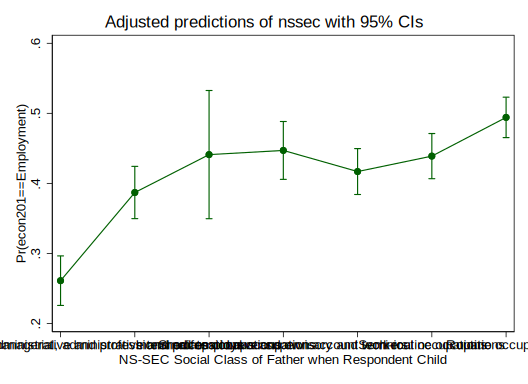

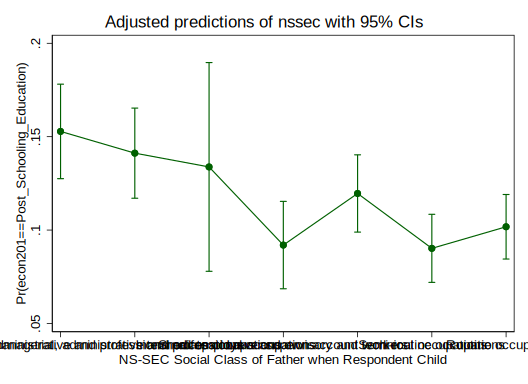

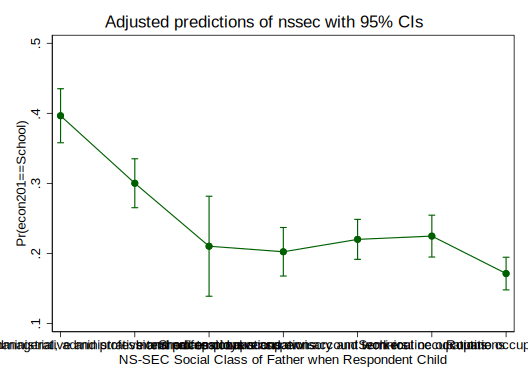

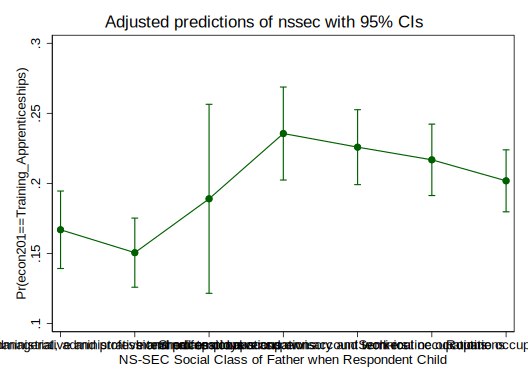

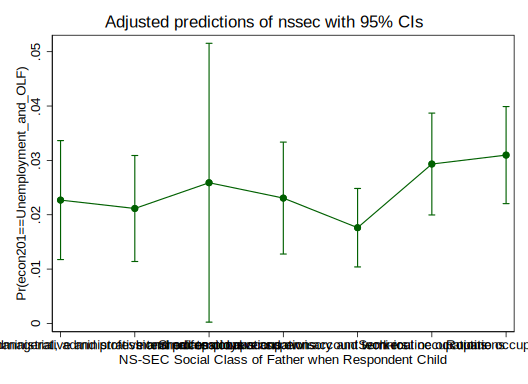

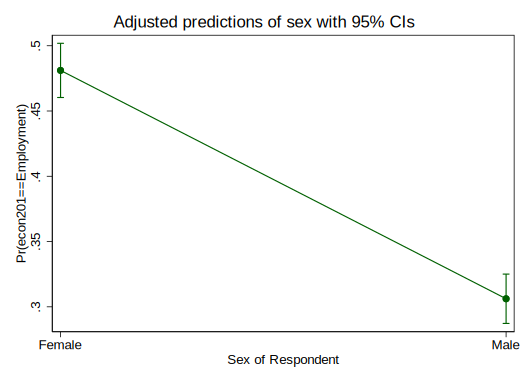

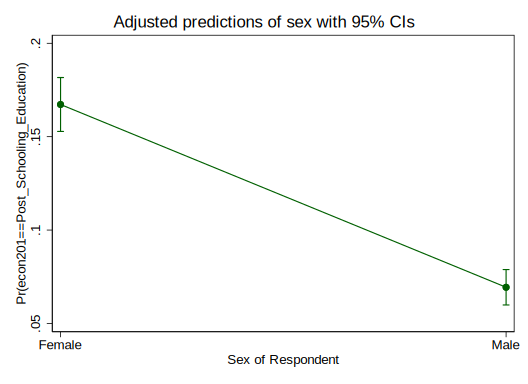

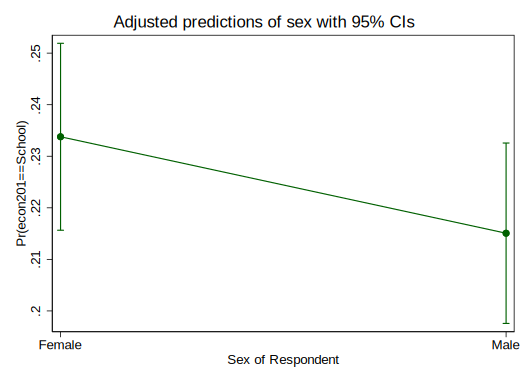

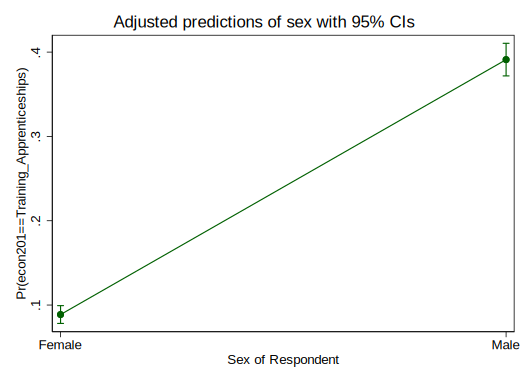

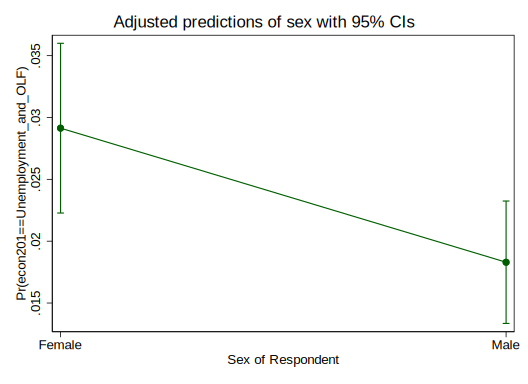

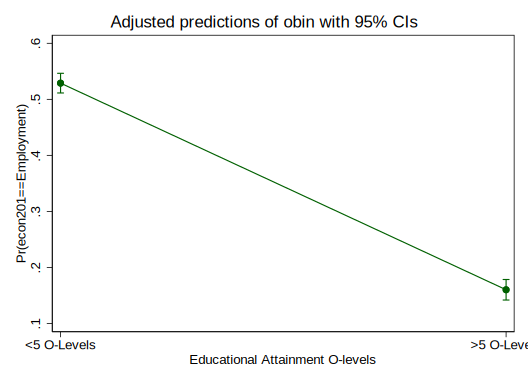

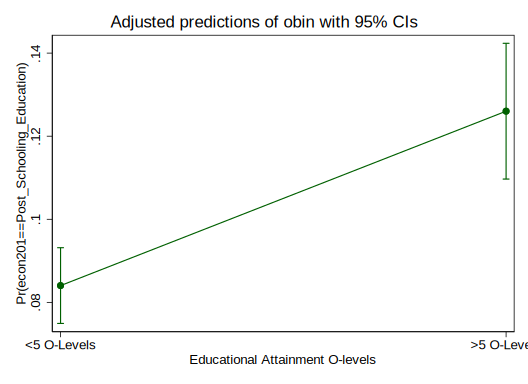

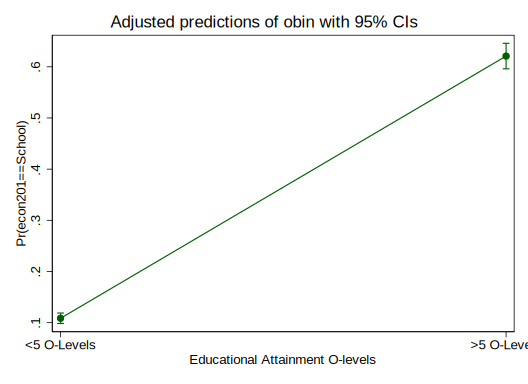

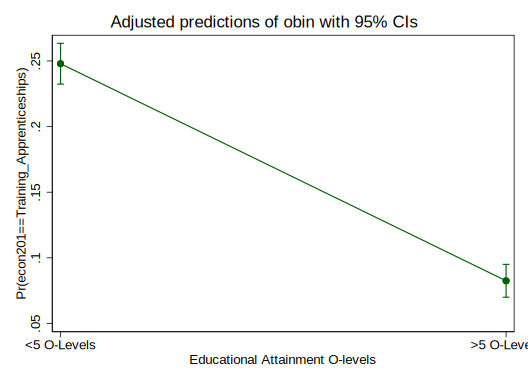

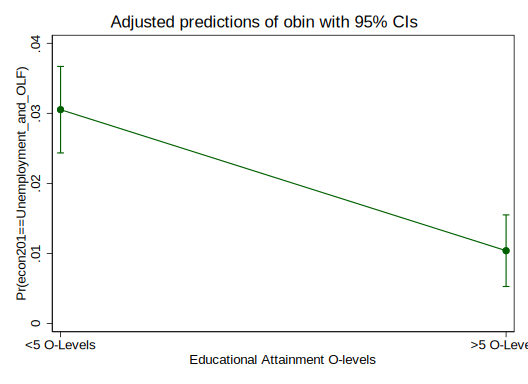

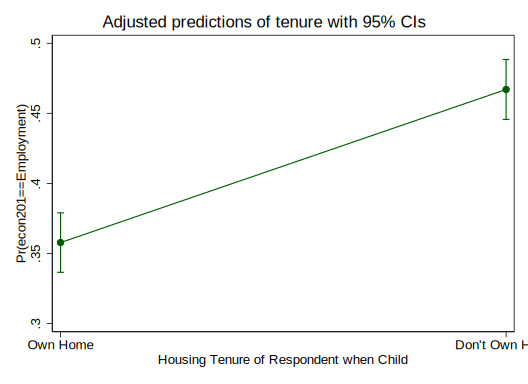

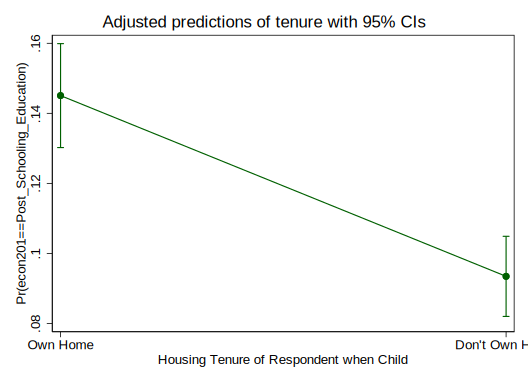

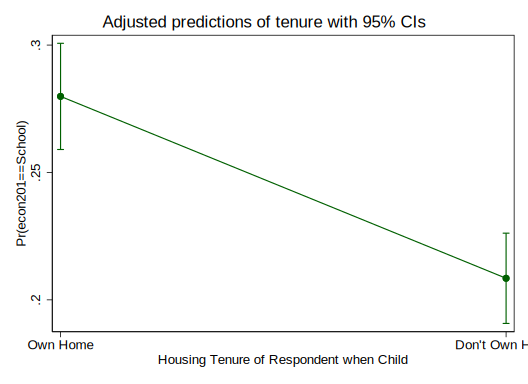

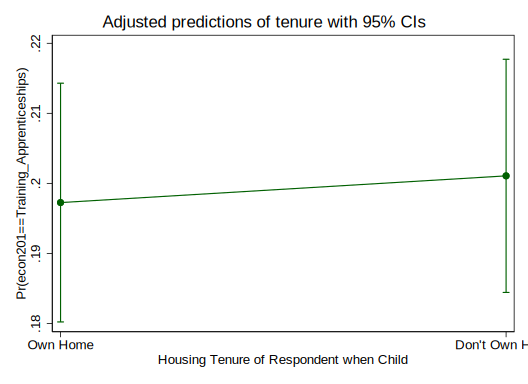

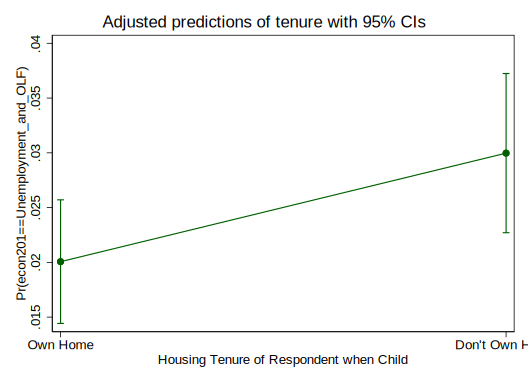

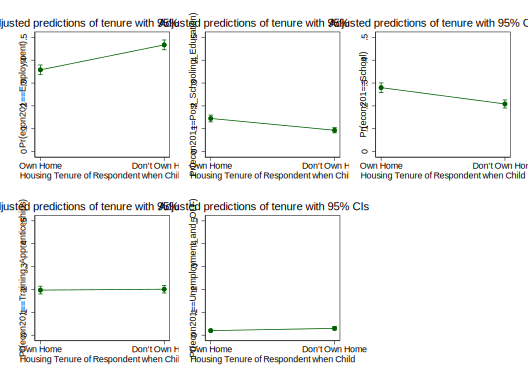

In [21]:
%%stata

mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths

set scheme s1color, permanent 
margins nssec, atmeans predict(outcome(1))
marginsplot, name(emean1)
margins nssec, atmeans predict(outcome(2))
marginsplot, name(smean1)
margins nssec, atmeans predict(outcome(3))
marginsplot, name(edmean1)
margins nssec, atmeans predict(outcome(4))
marginsplot, name(tmean1)
margins nssec, atmeans predict(outcome(5))
marginsplot, name(umean1)

graph combine emean1 smean1 edmean1 tmean1 umean1, ycommon

graph save "nssecnssec.gph", replace

mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths

margins sex, atmeans predict(outcome(1))
marginsplot, name(semean1)
margins sex, atmeans predict(outcome(2))
marginsplot, name(ssmean1)
margins sex, atmeans predict(outcome(3))
marginsplot, name(sedmean1)
margins sex, atmeans predict(outcome(4))
marginsplot, name(stmean1)
margins sex, atmeans predict(outcome(5))
marginsplot, name(sumean1)

graph combine semean1 ssmean1 sedmean1 stmean1 sumean1, ycommon

graph save "sexnssec.gph", replace

mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths

margins obin, atmeans predict(outcome(1))
marginsplot, name(oemean1)
margins obin, atmeans predict(outcome(2))
marginsplot, name(osmean1)
margins obin, atmeans predict(outcome(3))
marginsplot, name(oedmean1)
margins obin, atmeans predict(outcome(4))
marginsplot, name(otmean1)
margins obin, atmeans predict(outcome(5))
marginsplot, name(oumean1)

graph combine oemean1 osmean1 oedmean1 otmean1 oumean1, ycommon

graph save "obinnssec.gph", replace

mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths

margins tenure, atmeans predict(outcome(1))
marginsplot, name(temean1)
margins tenure, atmeans predict(outcome(2))
marginsplot, name(tsmean1)
margins tenure, atmeans predict(outcome(3))
marginsplot, name(tedmean1)
margins tenure, atmeans predict(outcome(4))
marginsplot, name(ttmean1)
margins tenure, atmeans predict(outcome(5))
marginsplot, name(tumean1)

graph combine temean1 tsmean1 tedmean1 ttmean1 tumean1, ycommon

graph save "tenurenssec.gph", replace


A quick postestimation test is also conducted. The Likelihood Ratio Test is the hypothesis that all the coefficients associated with educational attainment, sex, race, tenure, and NS-SEC are simultaneously equal to 0 can be rejected at the 0.01 level. Wald test concurs with these findings. A Hausman test of IIA is conducted and finds that three of the economic activity categories do not violate the IIA assumption, with the other three categories producing negative results indicating that there is also no violation (refer to Long and Freese 2006)

In [22]:
%%stata

quietly mlogit econ201 obin sex tenure nssec reading maths

mlogtest, lr wald hausman


. 
. quietly mlogit econ201 obin sex tenure nssec reading maths

. 
. mlogtest, lr wald hausman

**** Likelihood-ratio tests for independent variables (N=7915)

 Ho: All coefficients associated with given variable(s) are 0.

             |       chi2   df   P>chi2
-------------+-------------------------
        obin |   1524.811    4    0.000
         sex |    937.262    4    0.000
      tenure |     80.753    4    0.000
       nssec |    129.977    4    0.000
     reading |     58.497    4    0.000
       maths |     68.067    4    0.000
---------------------------------------

**** Wald tests for independent variables (N=7915)

 Ho: All coefficients associated with given variable(s) are 0.

             |       chi2   df   P>chi2
-------------+-------------------------
        obin |   1293.864    4    0.000
         sex |    762.200    4    0.000
      tenure |     80.945    4    0.000
       nssec |    129.521    4    0.000
     reading |     57.710    4    0.000
       maths |   

Exception in thread Stata:
Traceback (most recent call last):
  File "C:\Users\scott\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "E:\Stata SE\utilities\pystata\core\stout.py", line 176, in run
    raise SystemError(output)
SystemError: no coefficients in common; specify equations(matchlist)
for problems with different equation names.
r(498);
r(498);



As was done with the NS-SEC CCA model, the average marginal effect statistics will be saved and stored for later combination. 

In [23]:
%%stata

quietly mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths

margins, dydx(*) post

est store nssecccamarg

etable, append


. 
. quietly mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths

. 
. margins, dydx(*) post

Average marginal effects                                 Number of obs = 7,915
Model VCE: OIM

dy/dx wrt: 1.obin 1.sex 1.tenure 2.nssec 3.nssec 4.nssec 5.nssec 6.nssec
           7.nssec reading maths

1._predict: Pr(econ201==Employment), predict(pr outcome(1))
2._predict: Pr(econ201==Post_Schooling_Education), predict(pr outcome(2))
3._predict: Pr(econ201==School), predict(pr outcome(3))
4._predict: Pr(econ201==Training_Apprenticeships), predict(pr outcome(4))
5._predict: Pr(econ201==Unemployment_and_OLF), predict(pr outcome(5))

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
0.obin       |  (base outcome)
-------------+----------------------------------------

Finally to overcome the reference category problem that mlogit models + categorical variables present, quasi-variance statistics are produced. Unfortunately the Stata command 'qv' - the only command that produces QV statistics in Stata does not work with the mlogit command. Thus the QV statistics will need to be calculated away from stata thus breaking the workflow. Stata does provide the relevant statistics needed to calculate the QV statistics using the vce command however. This will be used. 

In [24]:
%%stata

quietly mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths

vce


. 
. quietly mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths

. 
. vce

Covariance matrix of coefficients of mlogit model

             | Employment                                                 
             |         1o.         1o.         1o.         2o.         3o.
        e(V) |       obin         sex      tenure       nssec       nssec 
-------------+------------------------------------------------------------
Employment   |                                                            
     1o.obin |          0                                                 
      1o.sex |          0           0                                     
   1o.tenure |          0           0           0                         
    2o.nssec |          0           0           0           0             
    3o.nssec |          0           0           0           0           0 
    4o.nssec |          0           0           0           0           0 
    5o.nssec |          0           0   

As done earlier, the model fit for both RGSC and CAMSIS will be looked at through the deviance, change in deviance, d.f, and R2. Most of this has already been done earlier but some additional fitstats are required. 

In [25]:
%%stata

quietly mlogit econ201 camsis

fitstat

quietly mlogit econ201 i.obin i.sex i.tenure camsis 

fitstat

quietly mlogit econ201 i.obin i.sex i.tenure camsis reading 

fitstat

quietly mlogit econ201 i.obin i.sex i.tenure camsis reading maths

fitstat


. 
. quietly mlogit econ201 camsis

. 
. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:     -10828.237   Log-Lik Full Model:         -10228.142
D(7907):                     20456.284   LR(4):                        1200.189
                                         Prob > LR:                       0.000
McFadden's R2:                   0.055   McFadden's Adj R2:               0.055
ML (Cox-Snell) R2:               0.141   Cragg-Uhler(Nagelkerke) R2:      0.150
Count R2:                        0.474   Adj Count R2:                    0.150
AIC:                             2.587   AIC*n:                       20472.284
BIC:                        -50521.020   BIC':                        -1164.283
BIC used by Stata:           20528.096   AIC used by Stata:           20472.284

. 
. quietly mlogit econ201 i.obin i.sex i.tenure camsis 

. 
. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:     -10828.237   Log-Lik Full Model:          -8170.8

Moving on to the sensitivity analysis now, the second model to look at is CAMSIS. The same procedures conducted for NS-SEC will now be repeated. 

In [26]:
%%stata

mlogit econ201 i.obin i.sex i.tenure camsis reading maths

est store camsiscca

etable, append


. 
. mlogit econ201 i.obin i.sex i.tenure camsis reading maths

Iteration 0:   log likelihood = -10828.237  
Iteration 1:   log likelihood = -8147.3778  
Iteration 2:   log likelihood = -8029.4449  
Iteration 3:   log likelihood = -8025.1944  
Iteration 4:   log likelihood = -8025.1861  
Iteration 5:   log likelihood = -8025.1861  

Multinomial logistic regression                        Number of obs =   7,915
                                                       LR chi2(24)   = 5606.10
                                                       Prob > chi2   =  0.0000
Log likelihood = -8025.1861                            Pseudo R2     =  0.2589

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
Employment   |  (base outcome)
-------------+----------------------------------------------------------------


Goodness-of-fit statistics test will now be run for CAMSIS. 

In [27]:
%%stata

quietly mlogit econ201 obin sex tenure camsis

mlogtest, lr wald hausman


. 
. quietly mlogit econ201 obin sex tenure camsis

. 
. mlogtest, lr wald hausman

**** Likelihood-ratio tests for independent variables (N=7915)

 Ho: All coefficients associated with given variable(s) are 0.

             |       chi2   df   P>chi2
-------------+-------------------------
        obin |   2901.260    4    0.000
         sex |    943.215    4    0.000
      tenure |     91.812    4    0.000
      camsis |    230.656    4    0.000
---------------------------------------

**** Wald tests for independent variables (N=7915)

 Ho: All coefficients associated with given variable(s) are 0.

             |       chi2   df   P>chi2
-------------+-------------------------
        obin |   2187.275    4    0.000
         sex |    767.468    4    0.000
      tenure |     91.948    4    0.000
      camsis |    221.760    4    0.000
---------------------------------------

**** Hausman tests of IIA assumption (N=7915)

 Ho: Odds(Outcome-J vs Outcome-K) are independent of other alt

Exception in thread Stata:
Traceback (most recent call last):
  File "C:\Users\scott\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "E:\Stata SE\utilities\pystata\core\stout.py", line 176, in run
    raise SystemError(output)
SystemError: no coefficients in common; specify equations(matchlist)
for problems with different equation names.
r(498);
r(498);



Marginal Effects tables will now be produced for CAMSIS. 

In [28]:
%%stata

mlogit econ201 i.obin i.sex i.tenure camsis reading maths

margins, dydx(*) post

est store camsisccamarg

etable, append


. 
. mlogit econ201 i.obin i.sex i.tenure camsis reading maths

Iteration 0:   log likelihood = -10828.237  
Iteration 1:   log likelihood = -8147.3778  
Iteration 2:   log likelihood = -8029.4449  
Iteration 3:   log likelihood = -8025.1944  
Iteration 4:   log likelihood = -8025.1861  
Iteration 5:   log likelihood = -8025.1861  

Multinomial logistic regression                        Number of obs =   7,915
                                                       LR chi2(24)   = 5606.10
                                                       Prob > chi2   =  0.0000
Log likelihood = -8025.1861                            Pseudo R2     =  0.2589

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
Employment   |  (base outcome)
-------------+----------------------------------------------------------------


Now onto the RGSC model, whereby deviance statistics, goodness-of-fit statistics, model, and marginal effects will be re-created. 

In [29]:
%%stata

quietly mlogit econ201 i.rgsc

fitstat

quietly mlogit econ201 i.obin i.sex i.tenure i.rgsc 

fitstat

quietly mlogit econ201 i.obin i.sex i.tenure i.rgsc reading 

fitstat

quietly mlogit econ201 i.obin i.sex i.tenure i.rgsc reading maths

fitstat

mlogit econ201 i.obin i.sex i.tenure i.rgsc reading maths

est store rgsccca

etable, append

fitstat

quietly mlogit econ201 obin sex tenure rgsc reading maths

mlogtest, lr wald hausman


. 
. quietly mlogit econ201 i.rgsc

. 
. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:     -10828.237   Log-Lik Full Model:         -10321.092
D(7891):                     20642.184   LR(20):                       1014.289
                                         Prob > LR:                       0.000
McFadden's R2:                   0.047   McFadden's Adj R2:               0.045
ML (Cox-Snell) R2:               0.120   Cragg-Uhler(Nagelkerke) R2:      0.129
Count R2:                        0.472   Adj Count R2:                    0.146
AIC:                             2.614   AIC*n:                       20690.184
BIC:                        -50191.496   BIC':                         -834.759
BIC used by Stata:           20857.620   AIC used by Stata:           20690.184

. 
. quietly mlogit econ201 i.obin i.sex i.tenure i.rgsc 

. 
. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:     -10828.237   Log-Lik Full Model:          -8183.4

Exception in thread Stata:
Traceback (most recent call last):
  File "C:\Users\scott\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "E:\Stata SE\utilities\pystata\core\stout.py", line 176, in run
    raise SystemError(output)
SystemError: no coefficients in common; specify equations(matchlist)
for problems with different equation names.
r(498);
r(498);



In [30]:
%%stata

quietly mlogit econ201 i.obin i.sex i.tenure i.rgsc reading maths

margins, dydx(*) post

est store rgscccamarg

etable, append


. 
. quietly mlogit econ201 i.obin i.sex i.tenure i.rgsc reading maths

. 
. margins, dydx(*) post

Average marginal effects                                 Number of obs = 7,915
Model VCE: OIM

dy/dx wrt: 1.obin 1.sex 1.tenure 2.rgsc 3.rgsc 4.rgsc 5.rgsc 6.rgsc reading
           maths

1._predict: Pr(econ201==Employment), predict(pr outcome(1))
2._predict: Pr(econ201==Post_Schooling_Education), predict(pr outcome(2))
3._predict: Pr(econ201==School), predict(pr outcome(3))
4._predict: Pr(econ201==Training_Apprenticeships), predict(pr outcome(4))
5._predict: Pr(econ201==Unemployment_and_OLF), predict(pr outcome(5))

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
0.obin       |  (base outcome)
-------------+------------------------------------------------------

The sensitivity analysis portion of analysis is now complete - from this it is concluded that the NS-SEC model is best going forward. This means that further analysis will continue will this model and this model alone. All that is left to do is to export the tables into word and save the dataset under a new name. 

In [31]:
%%stata

est table nsseccca nssecccamarg camsiscca camsisccamarg rgsccca rgscccamarg

collect style showbase all

collect label levels etable_depvar 1 "NS-SEC Model" ///
										2 "NS-SEC Marginal Effects" ///
										3 "CAMSIS Model" ///
										4 "CAMSIS Marginal Effects" ///
										5 "RGSC Model" ///
										6 "RGSC Marginal Effects", modify

collect style cell, font(Times New Roman)

etable, replay column(depvar) ///
cstat(_r_b, nformat(%4.2f))  ///
		cstat(_r_se, nformat(%6.2f))  ///
		showstars showstarsnote  ///
		stars(.05 "*" .01 "**" .001 "***", attach(_r_b)) ///
		mstat(N) mstat(aic) mstat(bic) mstat(r2_a)	///
		title("Table 2: Regression Models") ///
		titlestyles(font(Arial Narrow, size(14) bold)) ///
		note("Data Source: NCDS") ///
		notestyles(font(Arial Narrow, size(10) italic)) ///
		export("regressionchapterone.docx", replace)  

save ncds4_cca, replace



. 
. est table nsseccca nssecccamarg camsiscca camsisccamarg rgsccca rgscccamarg

-------------------------------------------------------------------------------
    Variable |  nsseccca    nsseccca~g   camsiscca    camsiscc~g    rgsccca    
-------------+-----------------------------------------------------------------
Employment   |
        obin |
          1  |  (omitted)                 (omitted)                 (omitted)  
             |
         sex |
          1  |  (omitted)                 (omitted)                 (omitted)  
             |
      tenure |
          1  |  (omitted)                 (omitted)                 (omitted)  
             |
       nssec |
          2  |  (omitted)                                                      
          3  |  (omitted)                                                      
          4  |  (omitted)                                                      
          5  |  (omitted)                                                    

Part Four: Handling Missing Data

Firstly, there is a need to use the earlier saved dataset with just the recoded and cleaned variables - without any models. 

In [32]:
%%stata

use "D:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9\ncds4_recoded"


. 
. use "D:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9\ncds4_recoded"

. 


Prior to any kind of imputation or handling missing data, the first thing that needs to be done is to remove any cases that are confirmed to be dead or attritioned out of the dataset. Fortunately, the NCDS has a variable that establishes just this - a tracing and contact variable. After dropping these cases, a table of missing patterns is produced to see the level of missingness. 

In [33]:
%%stata

drop if missing(n4118)

misstable summarize econ201 obin sex tenure nssec reading maths

misstable patterns econ201 obin sex tenure nssec reading maths


. 
. drop if missing(n4118)
(6,022 observations deleted)

. 
. misstable summarize econ201 obin sex tenure nssec reading maths
                                                               Obs<.
                                                +------------------------------
               |                                | Unique
      Variable |     Obs=.     Obs>.     Obs<.  | values        Min         Max
  -------------+--------------------------------+------------------------------
       econ201 |        86              12,450  |      5          1           5
          obin |        26              12,510  |      2          0           1
        tenure |     1,893              10,643  |      2          0           1
         nssec |     3,779               8,757  |      7          1           7
       reading |     1,747              10,789  |     36          0          35
         maths |     1,751              10,785  |     41          0          40
  ------------------------

Following on from this, for each variable a deeper look into the levels of missingness by frequency, mean, and standard deviation are provided. 

In [35]:
%%stata

quietly mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths

gen cc= e(sample)

foreach var in reading maths{
	tabstat `var', by(cc) stat(n mean sd)
}

foreach var in econ201 obin sex tenure nssec {
	tab `var' cc, col
}


. 
. quietly mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths


Exception in thread Stata:
Traceback (most recent call last):
  File "C:\Users\scott\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "E:\Stata SE\utilities\pystata\core\stout.py", line 176, in run
    raise SystemError(output)
SystemError: 
. 
. gen cc= e(sample)
variable cc already defined
r(110);
r(110);



It seems that missingness may be an issue with this data. Multiple Imputation is one way of solving an issue of missingness. To Impute data however there is a need for some auxillary variables to be included.

In [36]:
%%stata

tab n0region

gen acatnn0region = n0region
replace acatnn0region=. if (acatnn0region==-2)
replace acatnn0region=0 if (acatnn0region==1)
replace acatnn0region=1 if (acatnn0region==2)
replace acatnn0region=1 if (acatnn0region==3)
replace acatnn0region=1 if (acatnn0region==4)
replace acatnn0region=1 if (acatnn0region==5)
replace acatnn0region=1 if (acatnn0region==6)
replace acatnn0region=1 if (acatnn0region==7)
replace acatnn0region=1 if (acatnn0region==8)
replace acatnn0region=1 if (acatnn0region==9)
replace acatnn0region=1 if (acatnn0region==10)
replace acatnn0region=1 if (acatnn0region==11)

tab acatnn0region 

tab n99

gen bconnn99 = n99
replace bconnn99=. if (bconnn99==-1)
replace bconnn99=0 if (bconnn99==1)
replace bconnn99=1 if (bconnn99==2)
replace bconnn99=1 if (bconnn99==3)
replace bconnn99=1 if (bconnn99==4)
replace bconnn99=1 if (bconnn99==5)
replace bconnn99=1 if (bconnn99==6)
replace bconnn99=1 if (bconnn99==7)
replace bconnn99=1 if (bconnn99==8)
replace bconnn99=1 if (bconnn99==9)
replace bconnn99=1 if (bconnn99==10)
replace bconnn99=1 if (bconnn99==11)
replace bconnn99=1 if (bconnn99==12)
replace bconnn99=1 if (bconnn99==13)
replace bconnn99=1 if (bconnn99==14)

tab bconnn99

tab n197

gen maw5 = n197
replace maw5=. if (maw5==-1)
replace maw5=0 if (maw5==1)
replace maw5=1 if (maw5==2)
replace maw5=1 if (maw5==3)
replace maw5=1 if (maw5==4)

tab maw5

tab n512

gen aconnn512 = n512
replace aconnn512=. if (aconnn512==-1)
replace aconnn512=0 if (aconnn512==1)
replace aconnn512=1 if (aconnn512==2)
replace aconnn512=1 if (aconnn512==3)
replace aconnn512=1 if (aconnn512==4)
replace aconnn512=1 if (aconnn512==5)
replace aconnn512=1 if (aconnn512==6)

tab aconnn512

tab n236

gen acatnn236 = n236
replace acatnn236=. if (n236==-1)

tab acatnn236

tab n95

gen bcatnn95 = n95
replace bcatnn95=. if (bcatnn95==-1)
replace bcatnn95=0 if (bcatnn95==1)
replace bcatnn95=0 if (bcatnn95==2)
replace bcatnn95=0 if (bcatnn95==3)
replace bcatnn95=0 if (bcatnn95==4)
replace bcatnn95=1 if (bcatnn95==5)
replace bcatnn95=1 if (bcatnn95==6)
replace bcatnn95=1 if (bcatnn95==7)
replace bcatnn95=1 if (bcatnn95==8)
replace bcatnn95=1 if (bcatnn95==9)
replace bcatnn95=1 if (bcatnn95==10)
replace bcatnn95=1 if (bcatnn95==11)
replace bcatnn95=1 if (bcatnn95==12)
replace bcatnn95=1 if (bcatnn95==13)
replace bcatnn95=1 if (bcatnn95==14)
replace bcatnn95=1 if (bcatnn95==15)
replace bcatnn95=1 if (bcatnn95==16)
replace bcatnn95=1 if (bcatnn95==17)
replace bcatnn95=1 if (bcatnn95==18)
replace bcatnn95=1 if (bcatnn95==19)
replace bcatnn95=1 if (bcatnn95==20)
replace bcatnn95=1 if (bcatnn95==21)
replace bcatnn95=1 if (bcatnn95==22)

tab bcatnn95

tab n180

gen DadNeverReads = n180
replace DadNeverReads=. if (DadNeverReads==-1)
replace DadNeverReads=0 if (DadNeverReads==1)
replace DadNeverReads=1 if (DadNeverReads==2)
replace DadNeverReads=1 if (DadNeverReads==3)
replace DadNeverReads=1 if (DadNeverReads==4)

tab DadNeverReads

tab n1434

gen ccatnn1434 = n1434
replace ccatnn1434=. if (ccatnn1434==-1)
replace ccatnn1434=0 if (ccatnn1434==1)
replace ccatnn1434=1 if (ccatnn1434==2)
replace ccatnn1434=1 if (ccatnn1434==3)
replace ccatnn1434=1 if (ccatnn1434==4)
replace ccatnn1434=1 if (ccatnn1434==5)
replace ccatnn1434=1 if (ccatnn1434==6)
replace ccatnn1434=1 if (ccatnn1434==7)
replace ccatnn1434=1 if (ccatnn1434==8)
replace ccatnn1434=1 if (ccatnn1434==9)

tab ccatnn1434

tab n1150

gen ccatnn1150 = n1150
replace ccatnn1150=. if (ccatnn1150==-1)
replace ccatnn1150=0 if (ccatnn1150==1)
replace ccatnn1150=0 if (ccatnn1150==2)
replace ccatnn1150=0 if (ccatnn1150==3)
replace ccatnn1150=1 if (ccatnn1150==4)
replace ccatnn1150=1 if (ccatnn1150==5)
replace ccatnn1150=1 if (ccatnn1150==6)
replace ccatnn1150=1 if (ccatnn1150==7)
replace ccatnn1150=1 if (ccatnn1150==8)
replace ccatnn1150=1 if (ccatnn1150==9)

tab ccatnn1150

pca n914 n917
gen genability11= e(sample)

tab genability11

tab n204

gen toilet = n204
replace toilet=. if (toilet==-1)
replace toilet=. if (toilet==1)
replace toilet=0 if (toilet==2)
replace toilet=1 if (toilet==3)
replace toilet=1 if (toilet==4)

tab toilet

gen itoilet = n205
replace itoilet=. if (itoilet==-1)
replace itoilet=. if (itoilet==1)
replace itoilet=0 if (itoilet==2)
replace itoilet=1 if (itoilet==3)
replace itoilet=1 if (itoilet==4)

tab itoilet

gen otoilet = n206
replace otoilet=. if (otoilet==-1)
replace otoilet=. if (otoilet==1)
replace otoilet=0 if (otoilet==2)
replace otoilet=1 if (otoilet==3)
replace otoilet=1 if (otoilet==4)

tab otoilet

gen cooking = n207
replace cooking=. if (cooking==-1)
replace cooking=. if (cooking==1)
replace cooking=0 if (cooking==2)
replace cooking=1 if (cooking==3)
replace cooking=1 if (cooking==4)

tab cooking

gen water = n208
replace water=. if (water==-1)
replace water=. if (water==1)
replace water=0 if (water==2)
replace water=1 if (water==3)
replace water=1 if (water==4)

tab water

gen garden = n209
replace garden=. if (garden==-1)
replace garden=. if (garden==1)
replace garden=0 if (garden==2)
replace garden=1 if (garden==3)
replace garden=1 if (garden==4)

tab garden

tab n2492

gen dconnn2492 = n2492
replace dconnn2492=. if (dconnn2492==-1)
replace dconnn2492=0 if (dconnn2492==0)
replace dconnn2492=1 if (dconnn2492==1)
replace dconnn2492=1 if (dconnn2492==2)
replace dconnn2492=1 if (dconnn2492==3)
replace dconnn2492=1 if (dconnn2492==4)
replace dconnn2492=1 if (dconnn2492==5)
replace dconnn2492=1 if (dconnn2492==6)
replace dconnn2492=1 if (dconnn2492==7)
replace dconnn2492=1 if (dconnn2492==8)
replace dconnn2492=1 if (dconnn2492==9)

tab dconnn2492

tab n2825

gen dconnage16dv46 = n2825
replace dconnage16dv46=. if(dconnage16dv46==-1)
replace dconnage16dv46=0 if(dconnage16dv46==1)
replace dconnage16dv46=1 if(dconnage16dv46==2)
replace dconnage16dv46=1 if(dconnage16dv46==3)
replace dconnage16dv46=1 if(dconnage16dv46==4)
replace dconnage16dv46=1 if(dconnage16dv46==5)
replace dconnage16dv46=1 if(dconnage16dv46==6)

tab dconnage16dv46


. 
. tab n0region

 Region at PMS |
(1958) - Birth |      Freq.     Percent        Cum.
---------------+-----------------------------------
    Not in PMS |        646        5.15        5.15
         North |        892        7.12       12.27
    North West |      1,535       12.24       24.51
  E & W.Riding |        979        7.81       32.32
North Midlands |        906        7.23       39.55
      Midlands |      1,153        9.20       48.75
          East |        878        7.00       55.75
    South East |      2,179       17.38       73.13
         South |        683        5.45       78.58
    South West |        687        5.48       84.06
         Wales |        682        5.44       89.50
      Scotland |      1,316       10.50      100.00
---------------+-----------------------------------
         Total |     12,536      100.00

. 
. gen acatnn0region = n0region

. replace acatnn0region=. if (acatnn0region==-2)
(646 real changes made, 646 to missing)

. replace acatnn0

All potential auxillary variables have been coded. Now to assess their relative impact upon the outcome variable to assess their inclusion within the imputation model. 

In [37]:
%%stata

foreach var in acatnn0region bconnn99 maw5 aconnn512 acatnn236 bcatnn95 DadNeverReads ccatnn1434 ccatnn1150 genability11 toilet itoilet otoilet cooking water garden dconnn2492 dconnage16dv46{
	regress econ201 `var'
	testparm `var'
}


. 
. foreach var in acatnn0region bconnn99 maw5 aconnn512 acatnn236 bcatnn95 DadNe
> verReads ccatnn1434 ccatnn1150 genability11 toilet itoilet otoilet cooking wa
> ter garden dconnn2492 dconnage16dv46{
  2.         regress econ201 `var'
  3.         testparm `var'
  4. }

      Source |       SS           df       MS      Number of obs   =    11,811
-------------+----------------------------------   F(1, 11809)     =      0.05
       Model |  .087555788         1  .087555788   Prob > F        =    0.8166
    Residual |  19222.3696    11,809  1.62777286   R-squared       =    0.0000
-------------+----------------------------------   Adj R-squared   =   -0.0001
       Total |  19222.4572    11,810  1.62764244   Root MSE        =    1.2758

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
acatnn0reg~n 

From this, maw5 aconnn512 genability11 toilet itoilet cooking water dconnn2492 have associations with econ201. Next, the imputation model needs to be set, registered and finally imputed for further analysis to be done. 

In [38]:
%%stata

mi set wide

mi register imputed econ201 obin sex tenure nssec reading maths maw5 aconnn512 genability11 toilet itoilet cooking water dconnn2492
tab _mi_miss

mi impute chained ///
///
(logit, augment) obin sex tenure maw5 aconnn512 genability11 toilet itoilet cooking water dconnn2492 ///
///
(mlogit, augment) econ201 nssec ///
///
(regress) reading maths ///
///
, rseed(12346) dots force add(50) burnin(20) savetrace(MI_test_trace, replace)


. 
. mi set wide

. 
. mi register imputed econ201 obin sex tenure nssec reading maths maw5 aconnn51
> 2 genability11 toilet itoilet cooking water dconnn2492

. tab _mi_miss

 Incomplete |
observation |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      5,355       42.72       42.72
          1 |      7,181       57.28      100.00
------------+-----------------------------------
      Total |     12,536      100.00

. 
. mi impute chained ///
> ///
> (logit, augment) obin sex tenure maw5 aconnn512 genability11 toilet itoilet c
> ooking water dconnn2492 ///
> ///
> (mlogit, augment) econ201 nssec ///
> ///
> (regress) reading maths ///
> ///
> , rseed(12346) dots force add(50) burnin(20) savetrace(MI_test_trace, replace
> )
note: variables sex genability11 contain no soft missing (.) values; imputing
      nothing

Conditional models:
              obin: logit obin i.sex i.genability11 i.econ201 i.aconnn512
                     i.cook

The model has been imputed 50 iterations. Now to save the imputed dataset so this does not need to be repeated everytime the analysis is re-conducted. After this is done for each variable the iterations are graphed to assess the relative stability of their mean and standard deviation. If there is a relative stability then the number of iterations is generally considered high enough.  


. 
. save ncds_mi, replace
(file ncds_mi.dta not found)
file ncds_mi.dta saved

. 
. 
. cd "D:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9"
D:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9

. use "D:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9\MI_test_trace"
(Summaries of imputed values from -mi impute chained-)

. 
. foreach var in obin sex tenure maw5 aconnn512 genability11 toilet itoilet coo
> king water dconnn2492 econ201 nssec reading maths{
  2.         xtline `var'_mean, t(iter) i(m) overlay legend(off) name(graph1, r
> eplace)
  3.         xtline `var'_sd, t(iter) i(m) overlay legend(off) name(graph2, rep
> lace)
  4.         graph combine graph1 graph2, xcommon cols(1)
  5.         pause
  6. }


Exception in thread Stata:
Traceback (most recent call last):
  File "C:\Users\scott\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "E:\Stata SE\utilities\pystata\core\stout.py", line 176, in run
    raise SystemError(output)
SystemError: variable sex_mean not found
r(111);
r(111);



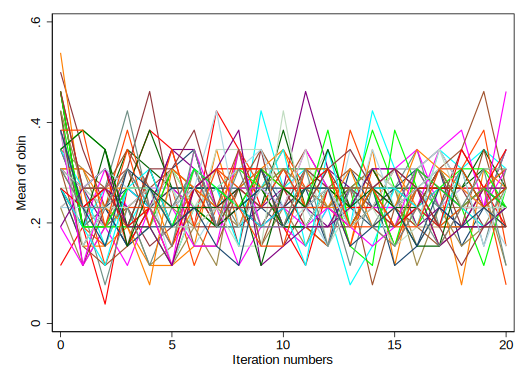

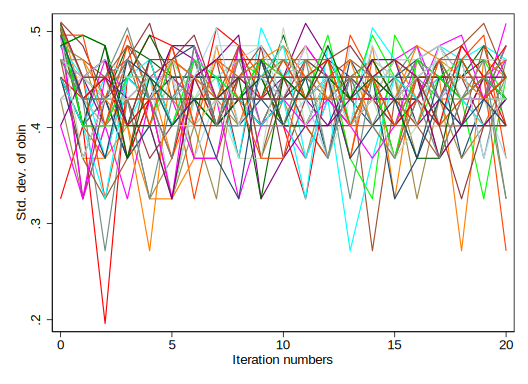

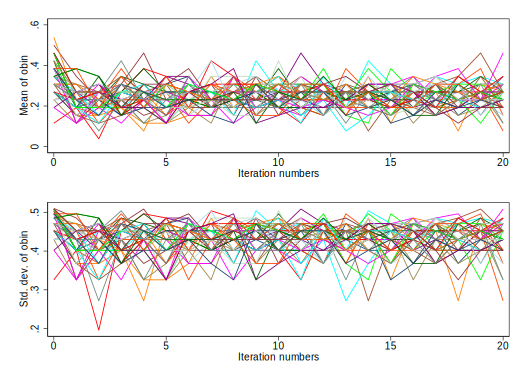

In [39]:
%%stata

save ncds_mi, replace


cd "D:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9"
use "D:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9\MI_test_trace"

foreach var in obin sex tenure maw5 aconnn512 genability11 toilet itoilet cooking water dconnn2492 econ201 nssec reading maths{
	xtline `var'_mean, t(iter) i(m) overlay legend(off) name(graph1, replace)
	xtline `var'_sd, t(iter) i(m) overlay legend(off) name(graph2, replace)
	graph combine graph1 graph2, xcommon cols(1)
	pause
}

save MI_test_trace, replace

use "D:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9\ncds_mi"

foreach var of varlist econ201 obin sex tenure nssec reading maths maw5 aconnn512 genability11 toilet itoilet cooking water dconnn2492 {
	tab1 `var'  _1_`var' _2_`var' _3_`var' _4_`var' _5_`var'
}

Everything appears to be stable, showing that 50 imputations appears to be enough. Finally, the model will be run using the imputed dataset. 

In [43]:
%%stata

use "D:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9\ncds_mi"

mi estimate, post dots: mlogit econ201 i.obin i.sex i.tenure i.nssec reading maths

est store imputed

etable


. 
. use "D:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9\ncds_mi"

. 
. mi estimate, post dots: mlogit econ201 i.obin i.sex i.tenure i.nssec reading 
> maths

Imputations (50):
  .........10.........20.........30.........40.........50 done

Multiple-imputation estimates                   Imputations       =         50
Multinomial logistic regression                 Number of obs     =     12,536
                                                Average RVI       =     0.2766
                                                Largest FMI       =     0.3599
DF adjustment:   Large sample                   DF:     min       =     385.46
                                                        avg       =  26,553.86
                                                        max       = 543,655.33
Model F test:       Equal FMI                   F(  44,40313.5)   =      94.46
Within VCE type:          OIM                   Prob > F          =     0.0000

----------------------------------------

Finally the analysis models are checked by looking at the vartable and dftable prior to saving the dataset one last time. 

In [44]:
%%stata

mi estimate, post vartable nocitable 

mi estimate, post dftable nocitable 

save ncds_mi, replace


. 
. mi estimate, post vartable nocitable 

Multiple-imputation estimates                   Imputations       =         50
Multinomial logistic regression

Variance information
------------------------------------------------------------------------------
             |        Imputation variance                             Relative
             |    Within   Between     Total       RVI       FMI    efficiency
-------------+----------------------------------------------------------------
1            |  (base outcome)
-------------+----------------------------------------------------------------
2            |
        obin |
>5 O-Levels  |   .008419   .000465   .008894   .056368   .053471       .998932
             |
         sex |
       Male  |   .005924   .000112   .006038    .01935   .018997        .99962
             |
      tenure |
Don't Own..  |   .005962    .00105   .007033   .179587   .153047       .996948
             |
       nssec |
Lower man..  |   .016768   .006466   .0

End.